In [1]:
import numpy as np
import cv2
import cPickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.figure
from matplotlib import mlab
import os
import json
import sys 

In [2]:
popularFile = "../Final_features/popularFaceCounts.pk"
unpopularFile = "../Final_features/unpopularFaceCounts.pk"
thirdsPopular = "../Final_features/popularThirdFaces.pk"
thirdsInsta = "../Final_features/instaSampledThirdsFaces.pk"
thirdsUnpopular = "../Final_features/unpopularThirdFaces.pk"


In [3]:
def readFaceCounts(fileName):
    lists = []
    infile = open(fileName, 'rb')
    while True:
        try:
            lists.append(pickle.load(infile))
        except EOFError:
            infile.close()
            break
    return lists

def removeDuplicatesAndSplit(lines):
    posts = []
    totFrames = []
    faceFrames = []
    profiles = []
    frontals = []
    for l in lines:
        comps = l.split(',')
        postId = comps[0]
        if postId in posts:
            break
        else:
            posts.append(postId)
            if int(comps[1]) == 0:
                totFrames.append(1)
            else:
                totFrames.append(int(comps[1]))
            faceFrames.append(int(comps[2]))
            profiles.append(int(comps[3]))
            frontals.append(int(comps[3]))
    return totFrames, faceFrames , posts
            

In [4]:
popLines = readFaceCounts(popularFile)
print len(popLines)


11448


In [5]:
unpopLines = readFaceCounts(unpopularFile)
print len(unpopLines)

12000


In [6]:
# samples = np.random.choice(len(unpopLines) , len(popLines))

In [7]:
# sampledPopLines = [popLines[i] for i in samples]

In [8]:
popTotFrames , popFaceFrames , popPosts = removeDuplicatesAndSplit(popLines)
facePercentages = np.zeros((len(popTotFrames),1))
for i in range(len(facePercentages)):
    facePercentages[i] = float(float(popFaceFrames[i])/float(popTotFrames[i]))

In [9]:
unpopTotFrames , unpopFaceFrames , unpopPosts = removeDuplicatesAndSplit(unpopLines)


In [10]:
print len(set(popPosts)) , len(set(unpopPosts))

11448 12000


In [11]:
unpopfacePercentages = np.zeros((len(unpopTotFrames),1))
for i in range(len(unpopfacePercentages)):
    unpopfacePercentages[i] = float(float(unpopFaceFrames[i])/float(unpopTotFrames[i]))

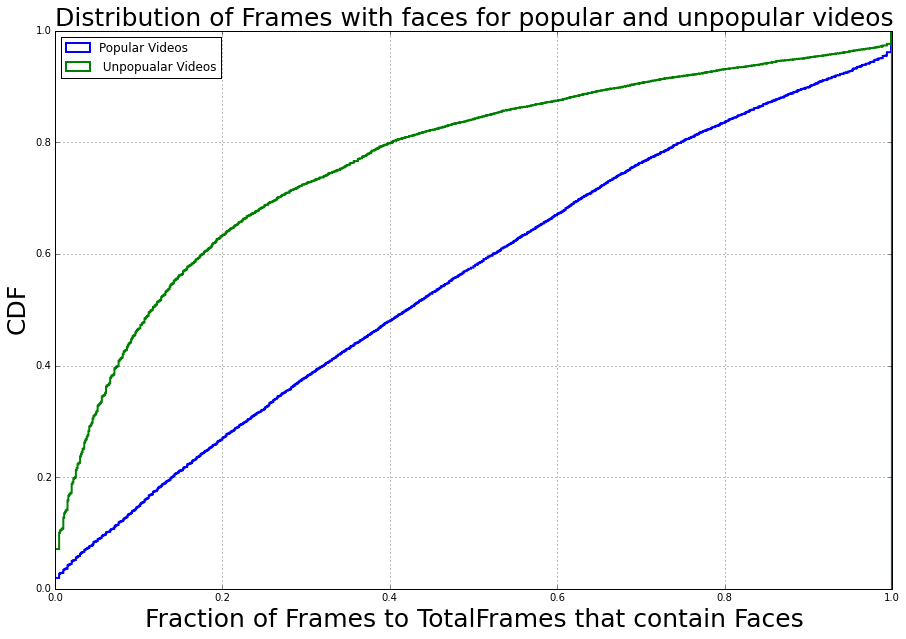

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.hist(facePercentages , 1000 , normed =1 , histtype='step' , cumulative=True ,linewidth = 2.0)
plt.hist(unpopfacePercentages , 1000 , normed =1 , histtype='step' , cumulative=True ,linewidth = 2.0)
plt.title("Distribution of Frames with faces for popular and unpopular videos",fontsize = 25)
plt.xlabel("Fraction of Frames to TotalFrames that contain Faces",fontsize = 25)
plt.ylabel("CDF",fontsize = 25)
plt.legend(['Popular Videos', ' Unpopualar Videos'], loc=2)
plt.grid(True)
plt.show()


In [13]:
print np.mean(facePercentages) , np.median(facePercentages) , np.mean(unpopfacePercentages) , np.median(unpopfacePercentages)

0.448451430977 0.420638923918 0.230611439976 0.116666666667


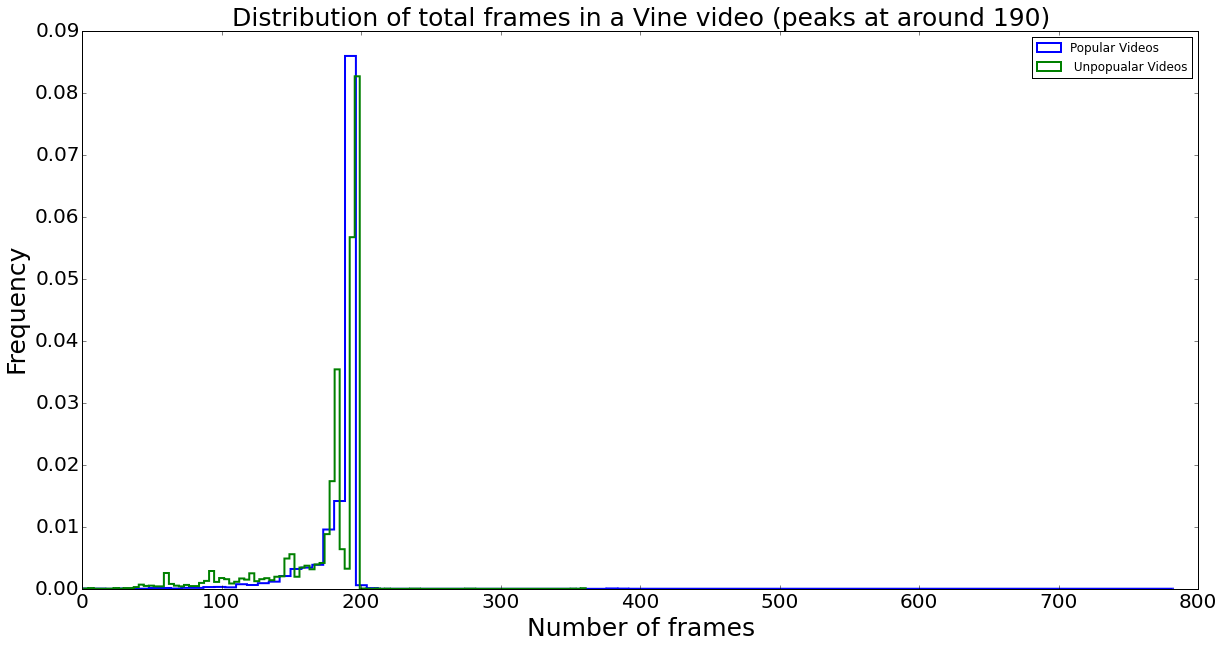

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.hist(popTotFrames , 100 , normed =1 , histtype='step' , cumulative=False ,linewidth = 2.0)
plt.hist(unpopTotFrames , 100 , normed =1 , histtype='step' , cumulative=False ,linewidth = 2.0)
plt.title("Distribution of total frames in a Vine video (peaks at around 190)",fontsize = 25)
plt.legend(['Popular Videos', ' Unpopualar Videos'])
plt.xlabel("Number of frames",fontsize = 25)
plt.ylabel("Frequency",fontsize = 25)
plt.show()


In [16]:
thirdsUnpopLines = readFaceCounts(thirdsUnpopular)
print len(thirdsUnpopLines)
thirdspopLines = readFaceCounts(thirdsPopular)
print len(thirdsUnpopLines)
thirdsinstaLines = readFaceCounts(thirdsInsta)
print len(thirdsinstaLines)

200
200
200


In [17]:
def getMaxHistogram(thirdsLines):
    maxHist = [0.0 , 0.0 , 0.0]
    for line in thirdsLines:
        comps = line.split(',')
        postId = comps[0]
        values = [float(comps[i]) for i in range(1,4)]
        maxIndex = np.argmax(np.asarray(values))
        maxHist[maxIndex]+=1
    #normMaxHist = [float(maxHist[i])/ ]
    return maxHist/np.sum(maxHist)

In [18]:
popMax = getMaxHistogram(thirdspopLines)
print popMax

[ 0.43  0.35  0.22]


In [19]:
unpopMax = getMaxHistogram(thirdsUnpopLines)
print unpopMax

[ 0.44   0.355  0.205]


In [20]:
instaMax = getMaxHistogram(thirdsinstaLines)
print instaMax

[ 0.425  0.36   0.215]


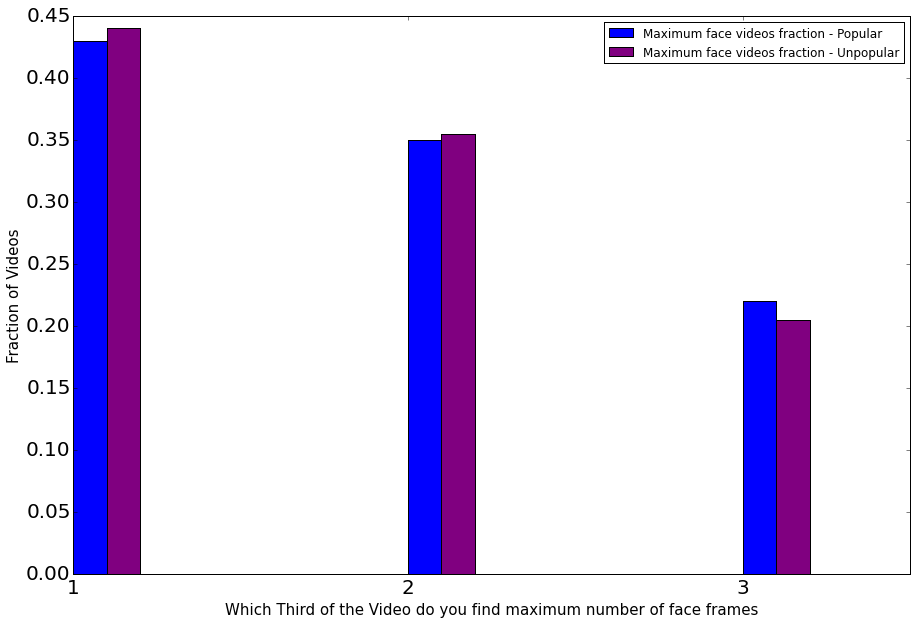

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ind = np.arange(1,4) 
width = 0.1
## the bars
rects1 = ax.bar(ind, popMax, width,
                color='b')
rects2 = ax.bar(ind+width, unpopMax, width,
                 color='purple')

# add some text for labels, title and axes ticks
ax.set_ylabel('Fraction of Videos',fontsize=15)
ax.set_xlabel('Which Third of the Video do you find maximum number of face frames',fontsize=15)
plt.legend(['Maximum face videos fraction - Popular' , 'Maximum face videos fraction - Unpopular' ]
            , loc='upper right')
ax.set_xticks(ind )

plt.show()